# NOTA

First submission

[My GitHub](https://github.com/Lud-T/Wrangle_openStreetMapData)



**What's new :**

First submission



Go to projet <li><a href="#summary">Summary</a></li>

Links I had to use to do the project.

**Overview**
More specifics pages and URL will be mentionned in the corresponding file. 

A lot of [GitHub](https://github.com/), it is so priceless I made one to help others.  
I learn a lot from the differents solutions every people used, then I have been able to create my solution I understand.


[Open Street Map WIKI](https://wiki.openstreetmap.org/wiki/Beginners_Guide_1.3)

[This one provided by Udacity as a model](https://gist.github.com/carlward/54ec1c91b62a5f911c42)


[Regular Expression officielle](https://docs.python.org/fr/3/howto/regex.html)  
[Official Regular Expression](https://docs.python.org/3/howto/regex.html)


[ForLoop](https://wiki.python.org/moin/ForLoop)


[Dictionnaires in FR](https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/232273-utilisez-des-dictionnaires)

[Dictionaries & Lists](https://docs.python.org/3/tutorial/datastructures.html)

[Dictionaries](https://www.programiz.com/python-programming/dictionary)

<a id='summary'></a>
# Project 2 : Wrangle OpenStreetMap Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Overview">Overview of data</a></li>

<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is about data wrangling of XML data from open street map.

[Map on OpenStreetMap](https://www.openstreetmap.org/#map=12/43.6246/5.1165)

[My data on GitHub](https://github.com/Lud-T/Wrangle_openStreetMapData/tree/main/data)

[Map download](https://overpass-api.de/api/map?bbox=5.0242,43.5703,5.2245,43.6798)


This map is where I live, I think I know well the place and its specificities. It will help me to identify errors.



<a id='Overview'></a>
## Overview

**According to "1-overview.ipynb" in my GitHub**  
Link to put

### I analyse the tags

```python
[('note', 1),
 ('meta', 1),
 ('bounds', 1),
 ('osm', 1),
 ('relation', 400),
 ('way', 58953),
 ('member', 124844),
 ('tag', 156258),
 ('node', 352867),
 ('nd', 482449)]
```



### I analyse the second level tags

**My comments on importing the data**

It seems data are well imported.

But : I do not know these date format.

**let's try all basics functions of dataframe**

[Exploration](https://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb#/9/1)

.info()  
.describe()  
.shape  
.isnull()  
.duplicated()  
.nunique()  
.empty() => not relevant

**NOTA**
I cleaned the columns names during the investigation in order to avoid making the code obsolete
I did not see any data value to clean as the goal is to predict if a patient will come or not and there were not a lot of bad data.


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What is the percentage of appointments patient did not come :

This question is pretty obvious.  
How many appointement are not honored.

Raw data are explicit but let's display them in a pie chart

**result** 

20% of appointments no patient come is huge.
If a doctor has 10 appointments a morning, it means 2 people do not come. In a day, it's up to 4 people !  
Let's check if the SMS reception change something

### Research Question 2  : SMS reception and appointments

Let's check if the reception of SMS may lead to more honored appointmens 

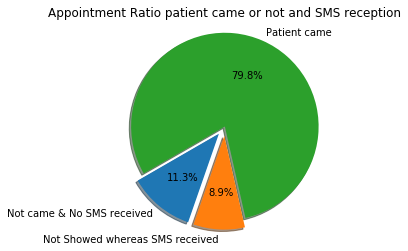

In [14]:
#Create a dataframe with only appointment without patient
df_not_came=df[df['Patient_came']==0]

#Now, I create 2 others from the previous one with the reception or not of SMS.

#No patient and No SMS
df_not_came_NoSMS = df_not_came[df_not_came['SMS_received']==0]

#No patient but SMS received
df_not_came_SMS = df_not_came[df_not_came['SMS_received']==1]

#Now, I want the count of appointment not honored
notCome = df_not_came.SMS_received.count()

#And the count of appopintement honored or not
total = df.No_show.count()

#No, I can calculate the ratio
#Appointement not honored and no SMS were sent
ratioNoSMS = (df_not_came_NoSMS.SMS_received.count()/total*100)

#Appointement not honored and but SMS were sent
ratioSMS = (df_not_came_SMS.SMS_received.count()/total*100)

#Some print to check the data
#print ('not come with SMS : ',ratioSMS)
#print ('not come without SMS : ',ratioNoSMS)
#print ('not come sum : ',df_not_came_SMS.SMS_received.count()+df_not_came_NoSMS.SMS_received.count())
#print('total',total)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not came & No SMS received', 'Not Showed whereas SMS received', 'Patient came'
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


#Data of the pie part !
showedNotshowed = [ratioNoSMS, ratioSMS, Showed/total*100]

#Just debug during learning :)
#print (showedNotshowed)

#Set and display graph
fig1, ax1 = plt.subplots()
ax1.pie(showedNotshowed, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=210)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Appointment Ratio patient came or not and SMS reception', fontdict=None, loc='center')

plt.show()




**result** 

When we look for the impact of the SMS, we see it is slighty better but I am not sure this is the most significant relationship to predict if an appointment will be honored or not.

### Research Question 3  : Age !

The age is an easy data to analyse.  
I tried 2 ways.

**First one : raw histogramm**

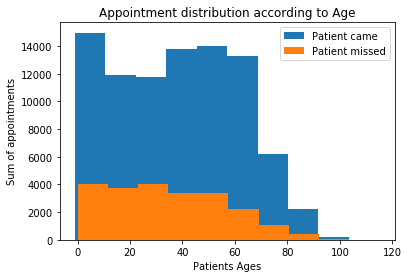

In [15]:
#I filter the data I want to hist
# age !


#Age total of appointment
#total = df.Age

#Age appointement honored
came = df.Age[df['Patient_came']==1]


#age appointment not honoured
notCame = df.Age[df['Patient_came']==0]

#totalV = plt.hist(total,bins=10)

#Display double hist
cameV = plt.hist(came,bins=10, label='Patient came')
notCameV = plt.hist(notCame,bins=10, label='Patient missed')

#Some check
#print (totalV)
#print (cameV)
#print (notCameV)
plt.legend()

#tableAgeNotCameRatio = pd.DataFrame((cameV[0]/totalV[0]*100).round(2))

#print(tableAgeNotCameRatio)

plt.title('Appointment distribution according to Age', fontdict=None, loc='center')
plt.ylabel('Sum of appointments')
plt.xlabel('Patients Ages')

#Set size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


The raw histogramm is not enough accurate to me.  



I prefer work with percentage 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


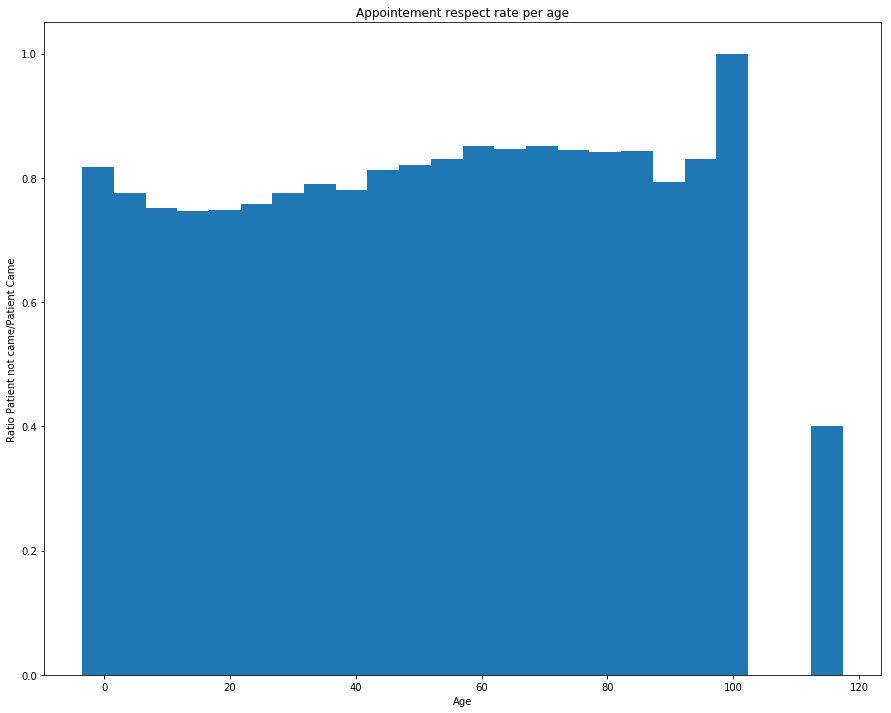

In [16]:
#https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count

#split data patient came to appointment
df_came=df[df['Patient_came']==1]

#ppointment patient were not showed
df_not_came=df[df['Patient_came']==0]


#Create Bins
age_bins=np.linspace(-1,120,25) #We can use age.max and .min for that

#Use np.histogram to generate histogram data

#Value of the distribution appointment people came
came_hist=np.histogram(df_came['Age'],bins=age_bins,range=(-1,120))

#Value of the distribution appointment people not showed
not_came_hist=np.histogram(df_not_came['Age'],bins=age_bins,range=(-1,120))

#Calculate survival rate in each bin
#I calculate with the value of the histogram thanks to the same number of bins !
came_rates=came_hist[0]/(came_hist[0]+not_came_hist[0])

#Plot
#Now I just have to display the ratio
plt.bar(age_bins[:-1],came_rates,width=age_bins[1]-age_bins[0])
plt.xlabel('Age')
plt.ylabel('Ratio Patient not came/Patient Came')

plt.title('Appointement respect rate per age');


**result** 

**NOTA** 
A division by 0 warning still allow me to display the graph

Raw histogramm was not enough to me but the ratio per age show appointments of  18 years old more or less patients are less honored than the others.  
Appointment for patient of an average of 70 years old are the most honored. (there is an exception at 100 but 100 is an exception)



### Research Question 4 : Delay !

Since the beginning of the study, I was sure the time before the appointment has an impact on the presence of the patient, let's check it.

In [17]:
#This part if only textual data and initialization ones

#As usual I keep the data I want

#Apppointement patient came
df_came=df[df['Patient_came']==1]

#Apppointement patient not came
df_not_came=df[df['Patient_came']==0]

#Print for check
#print ('deltaCameMax:',df_came.delta.max())
#print ('deltaNotCameMax:',df_not_came.delta.max())


#As I will check two set of data not really with the same bins value, I'll determine the maximum range !
#Maximum day before scheduling ! 
maxDelta = df_not_came.delta.dt.days.max()
if df_came.delta.dt.days.max() > maxDelta:
    maxDelta = df_came.delta.dt.days.max()
#Check I had the max of the dataframe, patient showed or not
#I may have used the original dataframe when I see the code now.
    
    
#Some print to check while I test the code step by step    
#print ('DeltaMax:',maxDelta)
#print ('deltaCameMin:',df_came.delta.min())
#print ('deltaNotCameMin:',df_not_came.delta.min())

#As I will check two set of data not really with the same bins value, I'll determine the range !
#Minimum day before scheduling !
minDelta = df_not_came.delta.dt.days.min()
if df_came.delta.dt.days.min() < minDelta:
    minDelta = df_came.delta.dt.days.min()
#Check I had the min of the two dataframe, patient showed or not
#I may have used the original dataframe when I see the code now.

#Some print to check while I test the code step by step
#print ('DeltaMin:',minDelta)    

#df_came.delta.max()
#print (maxDelta+pd.Timedelta(days=1))

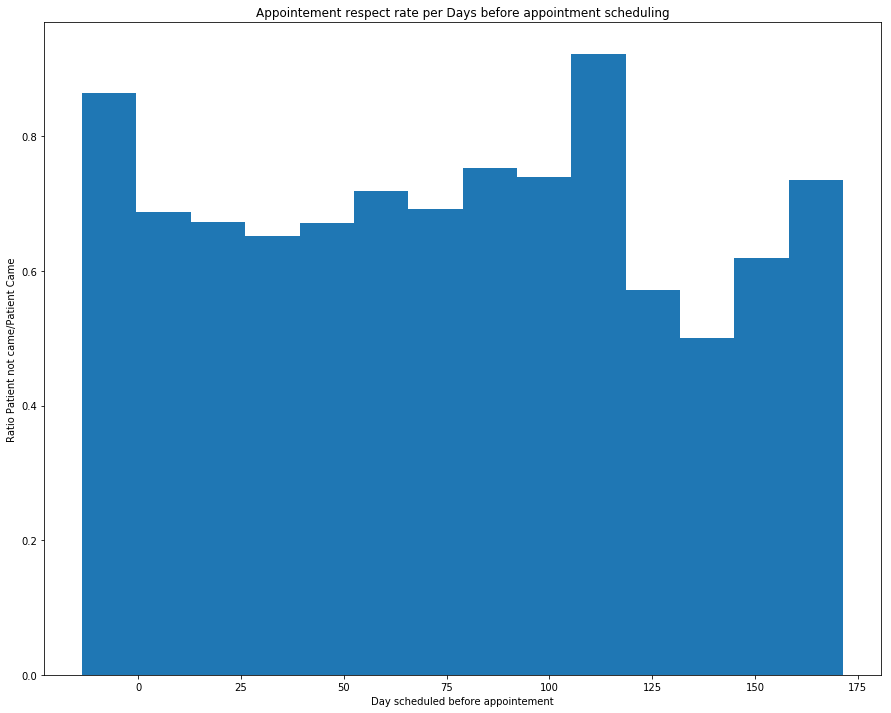

In [18]:
#https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count

#split data patient came to appointment
df_came=df[df['Patient_came']==1]

#appointment patient were not showed
df_not_came=df[df['Patient_came']==0]

#Create Bins
#Generate bins range automatically
#if the data change no code to change, it was not the case when I worked on ages
age_bins=np.linspace(minDelta,maxDelta,15)

#Use np.histogram to generate histogram data
#Value of the distribution appointment people came
came_hist=np.histogram(df_came['deltaDay'],bins=age_bins,range=(minDelta,maxDelta))

#Value of the distribution appointment people not showed
not_came_hist=np.histogram(df_not_came['deltaDay'],bins=age_bins,range=(minDelta,maxDelta))

#Calculate survival rate in each bin
#I calculate with the value of the histogram thanks to the same number of bins !
came_rates=came_hist[0]/(came_hist[0]+not_came_hist[0])

#Plot

plt.bar(age_bins[:-1],came_rates,width=age_bins[1]-age_bins[0])
plt.xlabel('Day scheduled before appointement')
plt.ylabel('Ratio Patient not came/Patient Came')
plt.title('Appointement respect rate per Days before appointment scheduling');

**result** 


We may see a tendancy to have more appointment honored when the scheduling was not so late.

I'll continue the exploration to find something more singnificant


### Research Question 5  : Desease !


Reminder : 20% of appointments no patient came in general

I will identify the patient with known medical problem and check if they are more respecting their appointments.

To do it, I keep only with Hypertension, Diabetes, Alcoholism is declared or handicap any of the ones.

In [19]:
#Create a dataframe with only people with disease or handicap known
#Disease be 1 or handicap must be different from 0
patient_with_medical_problem = df[
    (df["Hypertension"] == 1) |
    (df["Diabetes"] == 1) |
    (df["Alcoholism"] == 1) |
    (df["Handcap"] != 0)
]

In [20]:
#Now I filter from the previous table the number of appointment with or without patient
notShowedMP = patient_with_medical_problem.No_show.value_counts()['Yes']
totalAppointmentMP = patient_with_medical_problem.No_show.count()

print ('Appointment with Patient with known disease or handicap did not came : ',notShowedMP)
print ('Total of appointment with Patient with known disease or handicap : ',totalAppointmentMP)
print('Percentage appointment with Patient with known disease or handicap did not come',round(notShowedMP/totalAppointmentMP*100,2))

Appointment with Patient with known disease or handicap did not came :  4716
Total of appointment with Patient with known disease or handicap :  26412
Percentage appointment with Patient with known disease or handicap did not come 17.86


**result** 

Reminder : 20% of appointments no patient came in general  

17% did not came if we focus on appointment about patient with known disease or handicap.

I'll continue again the exploration to find something more singnificant

### Research Question 6  : Scholarship relation !

Let's check people under the state program

**result** 

This one seems pretty explicit !

Only 2.3% of the appointment were not honored when the patient has the benefit of the scholarship

<a id='limitations'></a>
## Limitations

Although the database is pretty clean in terms of data, I am not able to imagine predicting if an appointement will be respected or not without any doubt.

The AppointmentDay data with the time always at midnight is something we can improve.

The most impacting limitation of the database to me is the age distribution. The more patient are aged, the less data we will have. I notice some centenary people we may drop from the analysis.  

When I try to calculate the respect of appointment for each patient, the number of appointment a non respecful patient may be greater than a respectul one beacause he has to schedule another one.

Concerning the challenge I face during the projet, there are so many, I had to took, the problem step by step, adding more difficulties each time.  
Each answer can lead to another question, it is pretty difficult to find relevant question in the beginning of the project and it is also difficult to stop.
At first I was thinking it will be easy to work with percentage but I had look for a lot of documentation to figure out how to do it.  
I only begin to understand the documentation of pandas/numpy and Matplotlib but each time I come back to the project, I am more able to learn more.



<a id='conclusions'></a>
## Conclusions

My study highlights :  
1. 20% of appointement patient not came seems a huge to me.
2. Appointment of people under Scholarship are respected.
3. It seems the more appointment people have the more appointement they miss or mmaybe the more they miss the more they take.
4. I imagine the best thing to do is to score the trust of each patient in order to schedule them in a smart way.


**Nota**
Concerning what I learn, I only begin to feel all the possibility of python, pandas...etc
I still need to use the documentation and have to decompose my code a lot.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0